# Proyek Analisis Data: E-Commerce Public Dataset
- Nama: Wahyu Ezki Apriadi
- Email: wahyuezki15@gmail.com
- Id Dicoding:

## Menentukan Pertanyaan Bisnis

- Produk mana yang paling banyak dipesan
- Dari daerah mana customer yang paling banyak yang melakukan pesanan

## Menyiapkan semua library yang dibutuhkan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Load dataset untuk customer

customer_df = pd.read_csv("https://raw.githubusercontent.com/Ezki15/E-commerce_dataset/main/E_Commerce_Public_Dataset/customers_dataset.csv")

In [3]:
# Load dataset untuk order

order_item_df = pd.read_csv("https://raw.githubusercontent.com/Ezki15/E-commerce_dataset/main/E_Commerce_Public_Dataset/order_items_dataset.csv")
order_payments_df = pd.read_csv("https://raw.githubusercontent.com/Ezki15/E-commerce_dataset/main/E_Commerce_Public_Dataset/order_payments_dataset.csv")
order_reviews_df = pd.read_csv("https://raw.githubusercontent.com/Ezki15/E-commerce_dataset/main/E_Commerce_Public_Dataset/order_reviews_dataset.csv")
orders_df = pd.read_csv("https://raw.githubusercontent.com/Ezki15/E-commerce_dataset/main/E_Commerce_Public_Dataset/orders_dataset.csv")

In [4]:
# Load dataset untuk product

product_category_name_df = pd.read_csv("https://raw.githubusercontent.com/Ezki15/E-commerce_dataset/main/E_Commerce_Public_Dataset/product_category_name_translation.csv")
products_df = pd.read_csv("https://raw.githubusercontent.com/Ezki15/E-commerce_dataset/main/E_Commerce_Public_Dataset/products_dataset.csv")

In [5]:
# Load dataset untuk seller

sellers_df = pd.read_csv("https://raw.githubusercontent.com/Ezki15/E-commerce_dataset/main/E_Commerce_Public_Dataset/sellers_dataset.csv")

In [6]:
sellers_df.head()

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,4195,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,12914,braganca paulista,SP


In [7]:
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [8]:
orders_df.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,2017-11-18 19:45:59,2017-11-22 13:39:59,2017-12-02 00:28:42,2017-12-15 00:00:00
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,2018-02-13 22:20:29,2018-02-14 19:46:34,2018-02-16 18:17:02,2018-02-26 00:00:00


In [9]:
customer_df.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP


### Assessing Data

In [10]:
# Mencari informasi dasar pada setiap dataset
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


In [11]:
# Mencari nilai duplikat
print("Nilai duplikat pada dataset customer:",customer_df.duplicated().sum())

Nilai duplikat pada dataset customer: 0


Dataset customer tidak ada nilai null, tidak ada nilai duplikat dan dataset sudah clear

In [12]:
print(order_item_df.info())
print("\n============================================================\n")
print(order_payments_df.info())
print("\n============================================================\n")
print(order_reviews_df.info())
print("\n============================================================\n")
print(orders_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 103886 entries, 0 to 103885
Data columns (total 5 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   order_id              103886 non-null  object 
 1   payment_sequential    103886 non-null  int64  
 2   payment_type          103886 non-null  

In [13]:
# Jumlah nilai null dataset orders
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [14]:
orders_df.isnull().sum() / len(orders_df) * 100 #persentase nilai null pada dataset

order_id                         0.000000
customer_id                      0.000000
order_status                     0.000000
order_purchase_timestamp         0.000000
order_approved_at                0.160899
order_delivered_carrier_date     1.793023
order_delivered_customer_date    2.981668
order_estimated_delivery_date    0.000000
dtype: float64

In [15]:
print("Jumlah nilai duplikat pada order_item_df \t: ", order_item_df.duplicated().sum())
print("Jumlah nilai duplikat pada order_payments_df \t: ", order_payments_df.duplicated().sum())
print("Jumlah nilai duplikat pada order_reviews_df \t: ", order_reviews_df.duplicated().sum())
print("Jumlah nilai duplikat pada orders_df \t\t: ", orders_df.duplicated().sum())

Jumlah nilai duplikat pada order_item_df 	:  0
Jumlah nilai duplikat pada order_payments_df 	:  0
Jumlah nilai duplikat pada order_reviews_df 	:  0
Jumlah nilai duplikat pada orders_df 		:  0


In [16]:
order_payments_df.describe(include="all")

,order_id,payment_sequential,payment_type,payment_installments,payment_value
count,103886,103886.000000,103886,103886.000000,103886.000000
unique,99440,NaN,5,NaN,NaN
top,fa65dad1b0e818e3ccc5cb0e39231352,NaN,credit_card,NaN,NaN
freq,29,NaN,76795,NaN,NaN
mean,NaN,1.092679,NaN,2.853349,154.100380
std,NaN,0.706584,NaN,2.687051,217.494064
min,NaN,1.000000,NaN,0.000000,0.000000
25%,NaN,1.000000,NaN,1.000000,56.790000
50%,NaN,1.000000,NaN,1.000000,100.000000
75%,NaN,1.000000,NaN,4.000000,171.837500


In [17]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [18]:
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

In [19]:
print(product_category_name_df.info())
print("\n============================================================\n")
print(products_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71 entries, 0 to 70
Data columns (total 2 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   product_category_name          71 non-null     object
 1   product_category_name_english  71 non-null     object
dtypes: object(2)
memory usage: 1.2+ KB
None


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  fl

In [20]:
print("Nilai duplikat pada dataset product_category_name_df\t: ",product_category_name_df.duplicated().sum())
print("Nilai duplikat pada dataset products_df\t\t\t: ",products_df.duplicated().sum())
print()

Nilai duplikat pada dataset product_category_name_df	:  0
Nilai duplikat pada dataset products_df			:  0



In [21]:
print("Nilai null pada dataset product_category_name_df:\n",product_category_name_df.isnull().sum())
print()
print("Nilai null pada dataset products_df:\n",products_df.isnull().sum())

Nilai null pada dataset product_category_name_df:
 product_category_name            0
product_category_name_english    0
dtype: int64

Nilai null pada dataset products_df:
 product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64


In [22]:
# Mencari persen nilai null pada dataset
persentase = products_df.isnull().sum() / len(products_df) * 100
persentase

product_id                    0.000000
product_category_name         1.851234
product_name_lenght           1.851234
product_description_lenght    1.851234
product_photos_qty            1.851234
product_weight_g              0.006070
product_length_cm             0.006070
product_height_cm             0.006070
product_width_cm              0.006070
dtype: float64

Tidak ada masalah pada dataset product baik itu duplikat, maupun tipe data nilai kecuali nilai null.

In [23]:
sellers_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [24]:
print("Nilai duplikat pada dataset seller:",sellers_df.duplicated().sum())

Nilai duplikat pada dataset seller: 0


Setelah dilakukan proses assesing pada masing-masing dataset, ditemukan beberapa masalah seperti nilai null dan tipe data yang tidak sesuai. Berikut rangkuman hasil assesing data:

1. Dataset Customer dan sellers tidak terdapat masalah
2. Dataset Product terdapat nilai null
3. Dataset Order terdapat nilai null dan tipe data yang kurang tepat yaitu object yang seharusnya tipe data datetime

### Cleaning Data

Langkah-langkah untuk membersihkan data yang terdapat masalah
1. Mendrop data dengan nilai null (dataset product)
2. Mendrop column dataset yang kurang berguna
3. Merubah tipe data yang kurang tepat

In [25]:
# Merubah tipe data dari object menjadi datetime
order_item_df['shipping_limit_date'] = pd.to_datetime(order_item_df['shipping_limit_date'])

In [26]:
kolom = ['order_purchase_timestamp', 'order_approved_at', 'order_delivered_carrier_date', 'order_delivered_customer_date', 'order_estimated_delivery_date']

for i in kolom:
  orders_df[i] = pd.to_datetime(orders_df[i])

In [27]:
# Mendrop kolom yang tidak diperlukan
order_reviews_df = order_reviews_df.drop(['review_comment_title', 'review_comment_message', 'review_creation_date', 'review_answer_timestamp'], axis=1)

In [28]:
# Mendrop baris dengan nilai null (nilai null yang ditemukan dibawah 5% sehingga dianggap tidak masalah apabila di buang)
products_df = products_df.dropna()

In [29]:
products_df = products_df.drop(columns=['product_name_lenght', 'product_description_lenght',
                                        'product_photos_qty', 'product_weight_g', 'product_length_cm',
                                        'product_height_cm', 'product_width_cm'])

Setelah semua dataset sudah bersih, maka ada baiknya untuk digabung menjadi satu agar memudahkan dalam mengeksplor data dan mendapatkan insight yang berguna

In [30]:
products_name_eng = products_df.merge(product_category_name_df, how="left", left_on="product_category_name", right_on="product_category_name")

In [31]:
products_name_eng['product_category_name_english'] = products_name_eng['product_category_name_english'].fillna("portable kitchen and food preparation devices")

In [32]:
order_product = order_item_df.merge(products_name_eng, how='left', left_on='product_id', right_on='product_id')
order_product.head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,product_category_name_english
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,cool_stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,pet_shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,moveis_decoracao,furniture_decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumaria,perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,ferramentas_jardim,garden_tools


In [33]:
order_product = order_product.dropna()

In [34]:
order_product.isnull().sum()

order_id                         0
order_item_id                    0
product_id                       0
seller_id                        0
shipping_limit_date              0
price                            0
freight_value                    0
product_category_name            0
product_category_name_english    0
dtype: int64

In [35]:
order_product['product_category_name_english'].replace({'auto':'automotif'}, inplace=True)

In [36]:
customer_order = customer_df.merge(orders_df, how='inner', left_on='customer_id', right_on='customer_id')
customer_order.head()

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15


In [37]:
customer_order_item = customer_order.merge(order_item_df, how='right', left_on='order_id', right_on='order_id')

## Exploratory Data Analysis (EDA)

In [38]:
orders_df['order_status'].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

In [39]:
orders_df.groupby(by='order_status').count().sort_values("order_id", ascending=False)

,order_id,customer_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
order_status,,,,,,,
delivered,96478,96478,96478,96464,96476,96470,96478
shipped,1107,1107,1107,1107,1107,0,1107
canceled,625,625,625,484,75,6,625
unavailable,609,609,609,609,0,0,609
invoiced,314,314,314,314,0,0,314
processing,301,301,301,301,0,0,301
created,5,5,5,0,0,0,5
approved,2,2,2,2,0,0,2


### Explore ...

In [40]:
# Menemukan produk mana yang paling banyak dipesan
order_product.groupby("product_category_name_english").count()['order_id'].sort_values(ascending=False)

product_category_name_english
bed_bath_table               11115
health_beauty                 9670
sports_leisure                8641
furniture_decor               8334
computers_accessories         7827
                             ...  
arts_and_craftmanship           24
cds_dvds_musicals               14
la_cuisine                      14
fashion_childrens_clothes        8
security_and_services            2
Name: order_id, Length: 72, dtype: int64

In [41]:
# Mencari dari daerah mana customer banyak memesan produk
customer_order_item.groupby(by=['customer_city', 'customer_state']).order_id.count().sort_values(ascending=False)

customer_city            customer_state
sao paulo                SP                17808
rio de janeiro           RJ                 7837
belo horizonte           MG                 3144
brasilia                 DF                 2392
curitiba                 PR                 1751
                                           ...  
santa filomena           PE                    1
centro novo do maranhao  MA                    1
santa fe de minas        MG                    1
cerejeiras               RO                    1
madalena                 CE                    1
Name: order_id, Length: 4300, dtype: int64

## Visualization & Explanatory Analysis

Di tahap ini akan dibuat visualisasi dengan menggunakan seaborn dan matplotlib. Tapi sebelumnya, dataframe harus diformat ulang seperti mereset index agar lebih mudah untuk menvisualisasikannya.

In [42]:
plot_product_orders = order_product.groupby("product_category_name_english").count()['order_id'].sort_values(ascending=False).reset_index()
plot_product_orders = plot_product_orders.rename(columns={'order_id':'number_of_order', 'product_category_name_english':'product'})

In [43]:
plot_product_orders['product'] = plot_product_orders['product'].apply(lambda x: x.replace("_"," ").title())

In [44]:
plot_product_orders.head(10)

,product,number_of_order
0,Bed Bath Table,11115
1,Health Beauty,9670
2,Sports Leisure,8641
3,Furniture Decor,8334
4,Computers Accessories,7827
5,Housewares,6964
6,Watches Gifts,5991
7,Telephony,4545
8,Garden Tools,4347
9,Automotif,4235


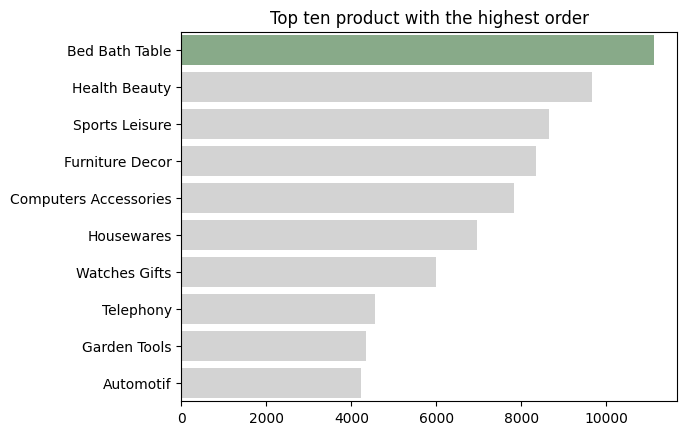

In [45]:
colors = ["#82b084", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3", "#D3D3D3"]

sns.barplot(x="number_of_order", y="product", data=plot_product_orders.head(10), palette=colors)
plt.xlabel(None)
plt.ylabel(None)
plt.title("Top ten product with the highest order")
plt.show()

In [46]:
plot_customer_order = customer_order_item.groupby(by=['customer_city', 'customer_state']).order_id.count().sort_values(ascending=False).reset_index()
plot_customer_order = plot_customer_order.rename(columns={'order_id':'number_of_order'})

In [47]:
plot_customer_order_state = plot_customer_order.groupby(by='customer_state').number_of_order.sum().sort_values(ascending=False)

In [48]:
plot_customer_order_state = plot_customer_order_state.reset_index()

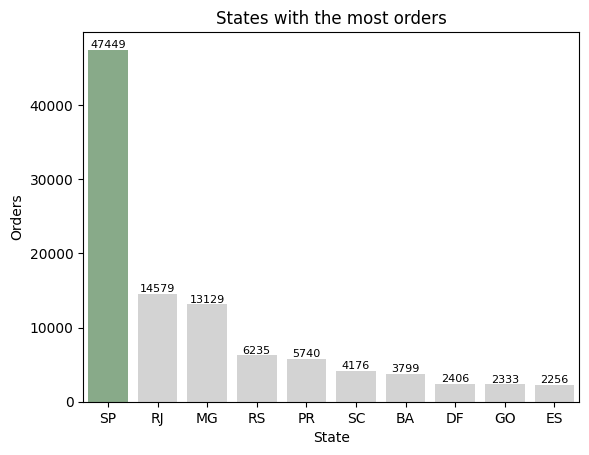

In [49]:
sns.barplot(x="customer_state", y="number_of_order", data=plot_customer_order_state.head(10), palette=colors)
for i, value in enumerate(plot_customer_order_state['number_of_order'].head(10)):
    plt.text(i, value + 0.1, str(value), ha='center', va='bottom', size=8)
plt.xlabel("State")
plt.ylabel("Orders")
plt.title("States with the most orders")
plt.show()

### Pertanyaan 1:

Produk manakah yang paling banyak dipesan?

### Pertanyaan 2:

Dimana wilayah customer yang paling banyak memesan produk?

## Conclusion

Jadi setelah dilakukan explorasi data, ditemukan jawaban dari pertanyaan-pertanyaan bisnis yang telah dibuat:
- Produk paling banyak yang dipesan adalah Bed Bath table dan
- Wilayah customer yang banyak memesan produk adalah dengan kode wilayah SP yaitu Sau Paulo